# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [66]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [67]:
url = "/Users/diegoo.guajardoo/Documents/Visual Studio Code/Python VS/Public Data Science/Pandas practices/Pandas Excercises guipsamora/pandas_exercises/01_Getting_&_Knowing_Your_Data/Chipotle/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. Assign it to a variable called chipo.

### Step 4. See the first 10 entries

In [68]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [69]:
# Solution 1
chipo.shape[0]


4622

In [70]:
# Solution 2
chipo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 6. What is the number of columns in the dataset?

In [71]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [72]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

### Step 8. How is the dataset indexed?

In [73]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [74]:
chipo.groupby("item_name").sum().sort_values(["quantity"],ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 10. For the most-ordered item, how many items were ordered?

### Step 11. What was the most ordered item in the choice_description column?

In [75]:
chipo.groupby("choice_description").sum().sort_values(["quantity"],ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [76]:
chipo.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [77]:
chipo["item_price"] = pd.to_numeric(chipo["item_price"].str[1:])


In [78]:
chipo["item_price"].dtypes

dtype('float64')

#### Step 13.b. Create a lambda function and change the type of item price

In [79]:
chipo["item_price"] = chipo["item_price"].apply(lambda x: str(x))

#### Step 13.c. Check the item price type

In [80]:
chipo["item_price"].dtypes

dtype('O')

### Step 14. How much was the revenue for the period in the dataset?

In [81]:
(chipo["quantity"] * pd.to_numeric(chipo["item_price"])).sum()

39237.02

### Step 15. How many orders were made in the period?

In [82]:
chipo["order_id"].value_counts().count()

1834

### Step 16. What is the average revenue amount per order?

7.841910975496616

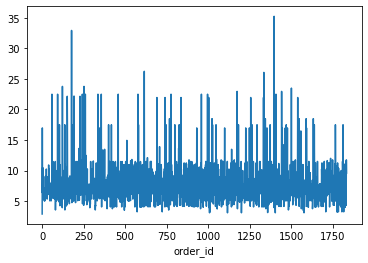

In [83]:
# Solution 1

chipo["item_price"] = pd.to_numeric(chipo["item_price"])
chipo.groupby("order_id")["item_price"].mean().plot()
chipo.groupby("order_id")["item_price"].mean().mean()

In [84]:
# Solution 2
chipo["revenue"] = chipo["item_price"] * chipo["quantity"]
np.round(chipo.groupby("order_id")["revenue"].sum().mean(),2)


21.39

### Step 17. How many different items are sold?

In [85]:
chipo["item_name"].nunique()

50